In [127]:
import pandas as pd
from geopy.distance import vincenty
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
df = pd.read_csv('test.csv')

In [210]:
df.head(1)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [211]:
df['distance_1'] = range(len(df.Latitude))

In [212]:
df['distance_1'] = df.distance_1.apply(lambda x: vincenty((df.Latitude[x], df.Longitude[x]),(41.995, -87.933)).miles)

In [213]:
df['distance_2'] = range(len(df.Latitude))
df['distance_2'] = df.distance_2.apply(lambda x: vincenty((df.Latitude[x], df.Longitude[x]),(41.786, -87.752)).miles)

In [214]:
df['airport'] = (df['distance_1'] > df['distance_2'])*1+1

In [215]:
df.head(1)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,distance_1,distance_2,airport
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,7.345852,11.913475,1


In [216]:
df2 = pd.read_csv('spray.csv')

In [217]:
df2.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [218]:
df3 = pd.read_csv('weather.csv')

In [219]:
df3.shape

(2944, 22)

In [220]:
df3.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [221]:
df_merged = pd.merge(df, df3, left_on = ['Date','airport'], right_on = ['Date','Station'], how= 'left')

In [222]:
df_merged.shape

(116293, 35)

In [224]:
df_merged.head(2)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,distance_1,distance_2,airport,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,7.345852,11.913475,1,1,86,61,74,7,56,64,0,9,0416,1926,,0,M,0.0,0.00,29.28,29.99,8.9,18,10.0
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,7.345852,11.913475,1,1,86,61,74,7,56,64,0,9,0416,1926,,0,M,0.0,0.00,29.28,29.99,8.9,18,10.0


In [225]:
pd.set_option('max_columns',len(df_merged.columns))

In [226]:
df_merged.head(1)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,distance_1,distance_2,airport,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,7.345852,11.913475,1,1,86,61,74,7,56,64,0,9,0416,1926,,0,M,0.0,0.00,29.28,29.99,8.9,18,10.0


In [227]:
df_merged.AddressAccuracy.value_counts()

8    61973
9    39795
5    13761
3      764
Name: AddressAccuracy, dtype: int64

In [228]:
df_merged.drop(['Trap','Depart','SnowFall','Depth', 'Address','Block','Street','AddressNumberAndStreet','AddressAccuracy','distance_1','distance_2','airport','Station'], axis = 1, inplace = True)

In [229]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 22 columns):
Id             116293 non-null int64
Date           116293 non-null object
Species        116293 non-null object
Latitude       116293 non-null float64
Longitude      116293 non-null float64
Tmax           116293 non-null int64
Tmin           116293 non-null int64
Tavg           116293 non-null object
DewPoint       116293 non-null int64
WetBulb        116293 non-null object
Heat           116293 non-null object
Cool           116293 non-null object
Sunrise        116293 non-null object
Sunset         116293 non-null object
CodeSum        116293 non-null object
Water1         116293 non-null object
PrecipTotal    116293 non-null object
StnPressure    116293 non-null object
SeaLevel       116293 non-null object
ResultSpeed    116293 non-null float64
ResultDir      116293 non-null int64
AvgSpeed       116293 non-null object
dtypes: float64(3), int64(5), object(14)
memory usage: 

In [230]:
df_merged.head()

,Id,Date,Species,Latitude,Longitude,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Water1,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,41.95469,-87.800991,86,61,74,56,64,0,9,0416,1926,,M,0.00,29.28,29.99,8.9,18,10.0
1,2,2008-06-11,CULEX RESTUANS,41.95469,-87.800991,86,61,74,56,64,0,9,0416,1926,,M,0.00,29.28,29.99,8.9,18,10.0
2,3,2008-06-11,CULEX PIPIENS,41.95469,-87.800991,86,61,74,56,64,0,9,0416,1926,,M,0.00,29.28,29.99,8.9,18,10.0
3,4,2008-06-11,CULEX SALINARIUS,41.95469,-87.800991,86,61,74,56,64,0,9,0416,1926,,M,0.00,29.28,29.99,8.9,18,10.0
4,5,2008-06-11,CULEX TERRITANS,41.95469,-87.800991,86,61,74,56,64,0,9,0416,1926,,M,0.00,29.28,29.99,8.9,18,10.0


In [231]:
sunrise = df_merged.Sunrise.tolist()

In [232]:
for n,i in enumerate(sunrise):
    if i == '-':
        sunrise[n] = sunrise[n-1]

In [233]:
sunset = df_merged.Sunset.tolist()

In [234]:
for n,i in enumerate(sunset):
    if i == '-':
        sunset[n] = sunset[n-1]

In [235]:
df_merged.Sunset = sunset

In [236]:
df_merged.Sunrise = sunrise

In [237]:
cols = ["Tavg","WetBulb","Heat","Cool","Sunrise","Sunset","PrecipTotal","StnPressure","SeaLevel","ResultSpeed","ResultDir","AvgSpeed"]

In [238]:
for i in cols:
    df_merged[i] = pd.to_numeric(df_merged[i], errors='coerce')

In [239]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 22 columns):
Id             116293 non-null int64
Date           116293 non-null object
Species        116293 non-null object
Latitude       116293 non-null float64
Longitude      116293 non-null float64
Tmax           116293 non-null int64
Tmin           116293 non-null int64
Tavg           116293 non-null int64
DewPoint       116293 non-null int64
WetBulb        116293 non-null int64
Heat           116293 non-null int64
Cool           116293 non-null int64
Sunrise        116293 non-null int64
Sunset         116293 non-null int64
CodeSum        116293 non-null object
Water1         116293 non-null object
PrecipTotal    107239 non-null float64
StnPressure    116293 non-null float64
SeaLevel       116293 non-null float64
ResultSpeed    116293 non-null float64
ResultDir      116293 non-null int64
AvgSpeed       116293 non-null float64
dtypes: float64(7), int64(11), object(4)
memory usage: 20

In [240]:
df_merged.StnPressure.mean()

29.311923503568988

In [241]:
df_merged.StnPressure.std()

0.12222330393831948

In [242]:
df_merged.StnPressure.fillna(df_merged.StnPressure.mean(), inplace = True)

In [243]:
df_merged['missing_precipt'] = df_merged['PrecipTotal'].isnull()*1

In [244]:
df_merged['missing_precipt'].value_counts()

0    107239
1      9054
Name: missing_precipt, dtype: int64

In [245]:
df_merged.Date = pd.to_datetime(df_merged.Date)

In [246]:
df_merged.head(3)

,Id,Date,Species,Latitude,Longitude,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Water1,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,missing_precipt
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,41.95469,-87.800991,86,61,74,56,64,0,9,416,1926,,M,0.0,29.28,29.99,8.9,18,10.0,0
1,2,2008-06-11,CULEX RESTUANS,41.95469,-87.800991,86,61,74,56,64,0,9,416,1926,,M,0.0,29.28,29.99,8.9,18,10.0,0
2,3,2008-06-11,CULEX PIPIENS,41.95469,-87.800991,86,61,74,56,64,0,9,416,1926,,M,0.0,29.28,29.99,8.9,18,10.0,0


In [247]:
df_merged.to_csv('mosquitos_test.csv')

In [248]:
df_merged = pd.read_csv('mosquitos_test.csv')

In [249]:
df_merged = pd.concat([df_merged,pd.get_dummies(df_merged.Species, drop_first=True)], axis=1)
df_merged.drop(['Species',"Unnamed: 0"], axis=1, inplace=True)
df_merged.head(3)

,Id,Date,Latitude,Longitude,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Water1,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,missing_precipt,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX
0,1,2008-06-11,41.95469,-87.800991,86,61,74,56,64,0,9,416,1926,,M,0.0,29.28,29.99,8.9,18,10.0,0,0,1,0,0,0,0,0
1,2,2008-06-11,41.95469,-87.800991,86,61,74,56,64,0,9,416,1926,,M,0.0,29.28,29.99,8.9,18,10.0,0,0,0,1,0,0,0,0
2,3,2008-06-11,41.95469,-87.800991,86,61,74,56,64,0,9,416,1926,,M,0.0,29.28,29.99,8.9,18,10.0,0,1,0,0,0,0,0,0


In [250]:
df_merged.Date = pd.to_datetime(df_merged.Date)

In [252]:
df_merged.PrecipTotal.isnull().sum()

9054

In [253]:
df_merged.PrecipTotal.fillna(value=0, inplace=True)

In [255]:
df_merged.WetBulb.fillna(method='pad', inplace=True)

In [120]:
from sklearn.preprocessing import StandardScaler

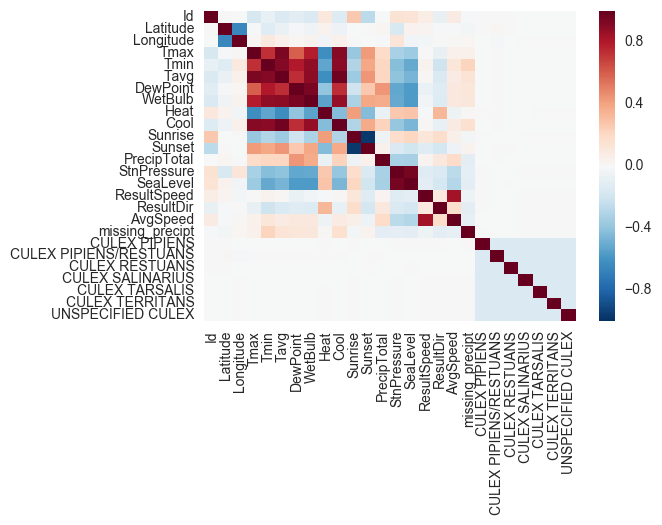

In [256]:
sns.heatmap(df_merged.corr())
plt.show()

In [261]:
X_test = df_merged.iloc[:,1:]

In [134]:
from sklearn.model_selection import train_test_split

In [132]:
from sklearn.linear_model import LogisticRegression

In [263]:
X_test.head(2)

,Date,Latitude,Longitude,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,missing_precipt,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX
0,2008-06-11,41.95469,-87.800991,86,61,74,56,64,0,9,416,1926,0.0,29.28,29.99,8.9,18,10.0,0,0,1,0,0,0,0,0
1,2008-06-11,41.95469,-87.800991,86,61,74,56,64,0,9,416,1926,0.0,29.28,29.99,8.9,18,10.0,0,0,0,1,0,0,0,0


In [285]:
X_test.iloc[:,1:]=X_test.iloc[:,1:].applymap(float)

In [290]:
X_test['year'] = X_test.Date.apply(lambda x: x.year)
X_test['month'] = X_test.Date.apply(lambda x: x.month)
X_test['day'] = X_test.Date.apply(lambda x: x.day)

In [291]:
X_test.head(2)

,Date,Latitude,Longitude,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,missing_precipt,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX,year,month,day
0,2008-06-11,41.95469,-87.800991,86.0,61.0,74.0,56.0,64.0,0.0,9.0,416.0,1926.0,0.0,29.28,29.99,8.9,18.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2008,6,11
1,2008-06-11,41.95469,-87.800991,86.0,61.0,74.0,56.0,64.0,0.0,9.0,416.0,1926.0,0.0,29.28,29.99,8.9,18.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2008,6,11


In [175]:
"""from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X.iloc[:,1:])"""

In [310]:
X['year'] = X.Date.apply(lambda x: x.year)
X['month'] = X.Date.apply(lambda x: x.month)
X['day'] = X.Date.apply(lambda x: x.day)

In [313]:
X.drop('NumMosquitos', inplace = True, axis = 1)

In [314]:
X_test.drop('UNSPECIFIED CULEX', inplace = True, axis =1)

In [317]:
for i,j in zip(X.columns,X_test.columns):
    if i != j:
        print i,j

In [293]:
X_test.iloc[:,1:].head(2)

,Latitude,Longitude,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,missing_precipt,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,UNSPECIFIED CULEX,year,month,day
0,41.95469,-87.800991,86.0,61.0,74.0,56.0,64.0,0.0,9.0,416.0,1926.0,0.0,29.28,29.99,8.9,18.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2008,6,11
1,41.95469,-87.800991,86.0,61.0,74.0,56.0,64.0,0.0,9.0,416.0,1926.0,0.0,29.28,29.99,8.9,18.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2008,6,11


In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [321]:
X.iloc[:,1:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 27 columns):
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
Tmax                      10506 non-null int64
Tmin                      10506 non-null int64
Tavg                      10506 non-null int64
DewPoint                  10506 non-null int64
WetBulb                   10506 non-null float64
Heat                      10506 non-null int64
Cool                      10506 non-null int64
Sunrise                   10506 non-null int64
Sunset                    10506 non-null int64
PrecipTotal               10506 non-null float64
StnPressure               10506 non-null float64
SeaLevel                  10506 non-null float64
ResultSpeed               10506 non-null float64
ResultDir                 10506 non-null int64
AvgSpeed                  10506 non-null float64
missing_precipt           10506 non-null int64
CULEX PIPIENS             105

In [322]:
lr = LogisticRegression()
lr.fit(X.iloc[:,1:],y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [323]:
y_pred = lr.predict(X_test.iloc[:,1:])

In [324]:
pd.Series(y_pred).value_counts()

0    116293
dtype: int64

In [193]:
from sklearn.metrics import accuracy_score, classification_report

In [194]:
accuracy_score(y_test, y_pred)

0.9467005076142132

In [195]:
print classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.95      1.00      0.97      2986
          1       0.40      0.02      0.05       166

avg / total       0.92      0.95      0.92      3152



In [182]:
from sklearn.tree import DecisionTreeClassifier

In [326]:
dtc = DecisionTreeClassifier()
dtc.fit(X.iloc[:,1:],y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [330]:
y_pred = dtc.predict(X_test.iloc[:,1:])

In [331]:
pd.Series(y_pred).value_counts()

0    113536
1      2757
dtype: int64

In [205]:
print classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.96      0.96      0.96      2986
          1       0.24      0.22      0.23       166

avg / total       0.92      0.92      0.92      3152



In [200]:
from sklearn.tree import ExtraTreeClassifier

In [332]:
etc = ExtraTreeClassifier()
etc.fit(X.iloc[:,1:],y)
y_pred = etc.predict(X_test.iloc[:,1:])

In [333]:
pd.Series(y_pred).value_counts()

0    112850
1      3443
dtype: int64

In [208]:
print classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.96      0.96      0.96      2986
          1       0.21      0.19      0.20       166

avg / total       0.92      0.92      0.92      3152

